In [136]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [137]:
originalImage = cv2.imread("../photos/Characters Test Pattern 688x688.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [138]:
def addSaltPeperNoise(image, saltRatio, pepperRatio):
    noisyImage = image.copy()
    numOfPixels = image.size
    numOfSaltPixels = int(saltRatio * numOfPixels)
    numOfPepperPixels = int(pepperRatio * numOfPixels)

    for i in range(numOfSaltPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 255
    
    for i in range(numOfPepperPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 0

    return noisyImage

In [139]:
def averageFilter(image, kernelSize):
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernelRegion = paddedImage[i: i+kernelSize, j: j+kernelSize]
            average = np.mean(kernelRegion)
            filteredImage[i, j] = average
    
    return filteredImage

In [140]:
def medianFilter(image, kernelSize):
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernelRegion = paddedImage[i: i+kernelSize, j: j+kernelSize]
            median = np.median(kernelRegion)
            filteredImage[i, j] = median
    
    return filteredImage

In [141]:
def calcPNSR(originalImage, degradedImage): #Peak Signal-to-Noise Ratio
    mse = np.mean((originalImage - degradedImage) ** 2) # Mean Squared Error (MSE)
    if mse == 0:
        return np.inf
    maxPixelValue = 255.0
    pnsrValue = 20 * np.log10(maxPixelValue / np.sqrt(mse))
    return round(pnsrValue, 2)

In [142]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)

    print(f"comute pnsr: {20 * np.log10(255.0 / np.sqrt(mse))}")
    
    return round(psnr, 2)

Text(0.5, 1.0, 'Median Filtered Image (PNSR=45.21)')

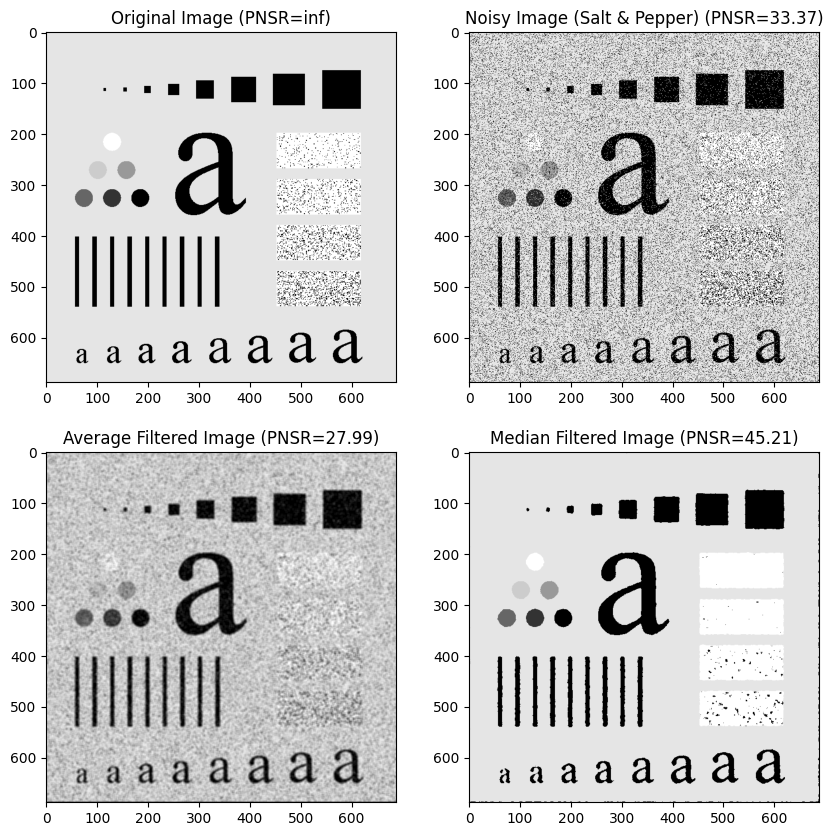

In [143]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image (PNSR={calcPNSR(originalImage, originalImage)})")

noisyImage = addSaltPeperNoise(originalImage, 0.05, 0.15)
plt.subplot(2, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title(f"Noisy Image (Salt & Pepper) (PNSR={calcPNSR(originalImage, noisyImage)})")

averageFilteredImage = averageFilter(noisyImage, 5)
plt.subplot(2, 2, 3)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Average Filtered Image (PNSR={calcPNSR(originalImage, averageFilteredImage)})")

medianFilteredImage = medianFilter(noisyImage, 5)
plt.subplot(2, 2, 4)
plt.imshow(medianFilteredImage, cmap='gray')
plt.title(f"Median Filtered Image (PNSR={calcPNSR(originalImage, medianFilteredImage)})")

comute pnsr: 9.693628687148445
comute pnsr: 14.769844834580732
comute pnsr: 17.4680352586549


Text(0.5, 1.0, 'Median Filtered Image (PNSR=17.47)')

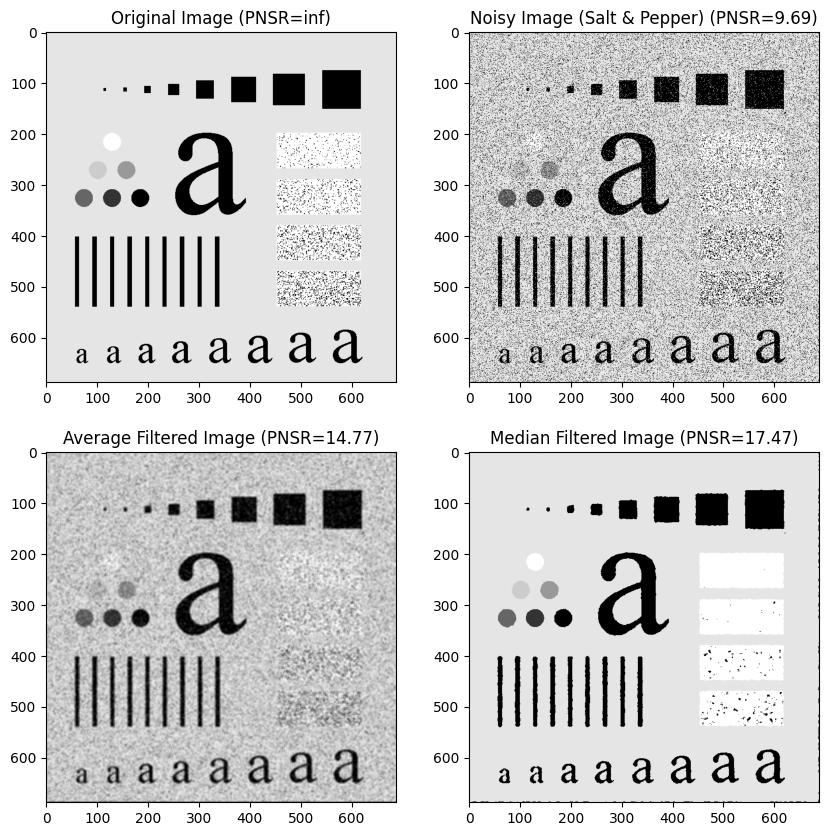

In [144]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image (PNSR={calcPNSR(originalImage, originalImage)})")

noisyImage = addSaltPeperNoise(originalImage, 0.05, 0.15)
plt.subplot(2, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title(f"Noisy Image (Salt & Pepper) (PNSR={compute_psnr(originalImage, noisyImage)})")

averageFilteredImage = averageFilter(noisyImage, 5)
plt.subplot(2, 2, 3)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Average Filtered Image (PNSR={compute_psnr(originalImage, averageFilteredImage)})")

medianFilteredImage = medianFilter(noisyImage, 5)
plt.subplot(2, 2, 4)
plt.imshow(medianFilteredImage, cmap='gray')
plt.title(f"Median Filtered Image (PNSR={compute_psnr(originalImage, medianFilteredImage)})")

Average Mean Filtered Image:
The term "average mean filtered image" seems redundant, as the mean filter itself involves averaging pixel values. The filtered image is often referred to simply as the "mean filtered image."
Use Cases and Considerations:
Image Smoothing:

Mean filters are frequently used for pre-processing tasks where a smoother version of the image is desired. This can be useful before performing operations like edge detection or segmentation.
Kernel Size:

The size of the neighborhood, or kernel, used for averaging determines the extent of smoothing. Larger kernel sizes result in more extensive smoothing, but details may be lost.
Trade-off:

While mean filtering is effective in reducing noise and smoothing, it may also result in a loss of fine details and edges. The choice of filter size is often a trade-off between noise reduction and preserving important features.

Average (Mean) Filter:

An average filter involves replacing each pixel value with the average value of its neighboring pixels in a local region (kernel). This process is aimed at smoothing or blurring the image.
Median Filter:

A median filter replaces each pixel value with the median value of its neighboring pixels in a local region (kernel). The median filter is particularly effective at reducing impulse noise (such as salt-and-pepper noise) while preserving edges and details.